## Import neccesory libraires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

## Load and preprocess

In [3]:
path = 'drug.csv'
df = pd.read_csv(path)
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [63]:
df.tail()

,age,sex,bp,cholesterol,na_to_k,drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [64]:
df.describe()

,age,na_to_k
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [65]:
df.isna().sum()

,0
age,0
sex,0
bp,0
cholesterol,0
na_to_k,0
drug,0


In [66]:
df['drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [67]:
df.dtypes

,0
age,int64
sex,object
bp,object
cholesterol,object
na_to_k,float64
drug,object


In [68]:
df.columns

Index(['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug'], dtype='object')

## Distribution of object columns

<ipython-input-69-024f8f2d6d42>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


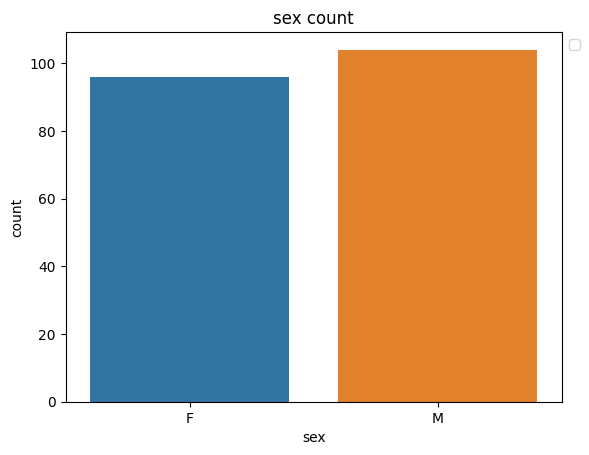

<ipython-input-69-024f8f2d6d42>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


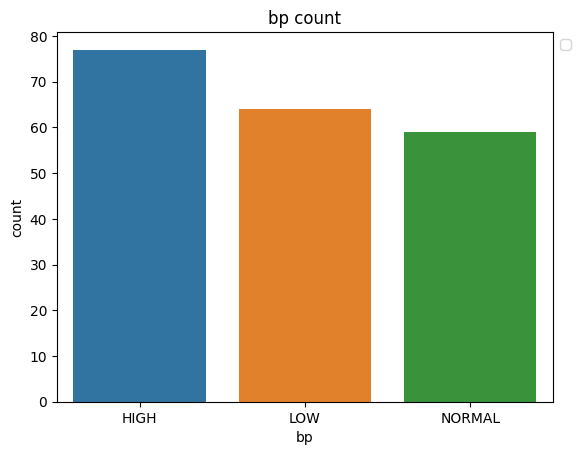

<ipython-input-69-024f8f2d6d42>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


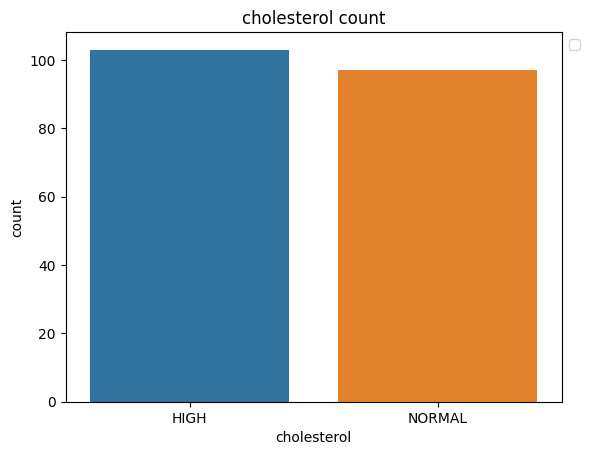

<ipython-input-69-024f8f2d6d42>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


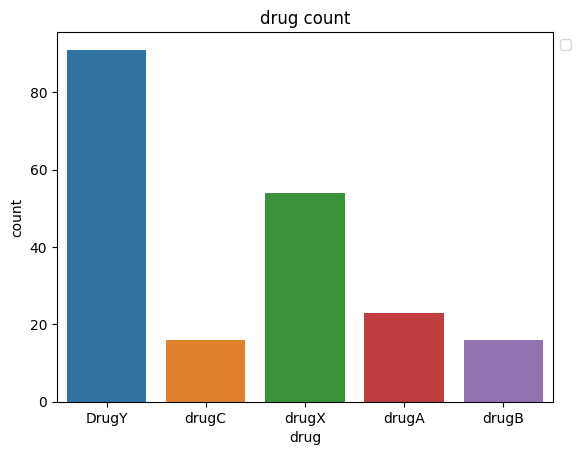

In [69]:
for i in df.select_dtypes(include="object"):
  sns.countplot(x=i,data = df,hue=i)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.title(f'{i} count')

  plt.show()
  print("")

In [70]:
encoder = LabelEncoder()
index = ['sex', 'bp', 'cholesterol']
for col in index:
  df[col] = encoder.fit_transform(df[col])
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [71]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [73]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## model creation and evaluation

In [74]:


knn = KNeighborsClassifier(n_neighbors=7)
bnb = MultinomialNB()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [knn,bnb,svm]


Model is :  KNeighborsClassifier(n_neighbors=7)

               precision    recall  f1-score   support

       DrugY       0.77      0.65      0.71        26
       drugA       0.60      0.86      0.71         7
       drugB       0.75      1.00      0.86         3
       drugC       0.50      0.17      0.25         6
       drugX       0.77      0.94      0.85        18

    accuracy                           0.73        60
   macro avg       0.68      0.72      0.67        60
weighted avg       0.72      0.73      0.71        60


 accuracy =  0.7333333333333333


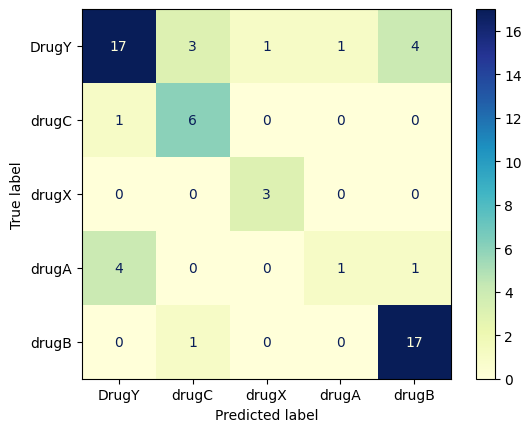

----------------------------------------------------------------------------------------------------
Model is :  MultinomialNB()

               precision    recall  f1-score   support

       DrugY       0.46      1.00      0.63        26
       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       1.00      0.22      0.36        18

    accuracy                           0.50        60
   macro avg       0.29      0.24      0.20        60
weighted avg       0.50      0.50      0.38        60


 accuracy =  0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


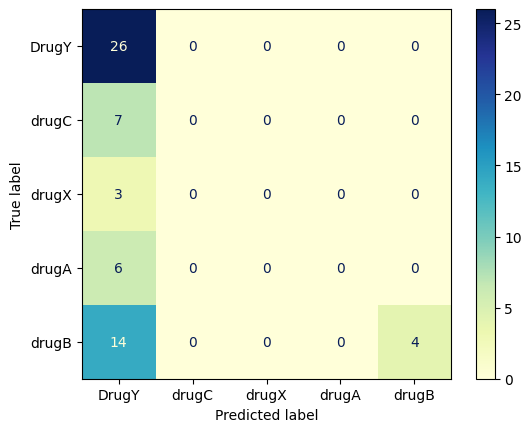

----------------------------------------------------------------------------------------------------
Model is :  SVC()

               precision    recall  f1-score   support

       DrugY       0.79      0.88      0.84        26
       drugA       1.00      0.86      0.92         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      0.17      0.29         6
       drugX       0.95      1.00      0.97        18

    accuracy                           0.85        60
   macro avg       0.87      0.78      0.75        60
weighted avg       0.87      0.85      0.83        60


 accuracy =  0.85


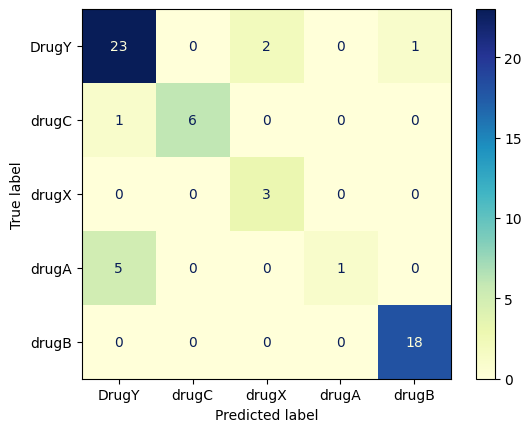

----------------------------------------------------------------------------------------------------


In [75]:
for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print('Model is : ',model)
  print('\n',classification_report(y_test,y_pred))
  print('\n accuracy = ',accuracy_score(y_test,y_pred))
  cm=confusion_matrix(y_test,y_pred)
  cm
  label=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']
  cmd=ConfusionMatrixDisplay(cm,display_labels=label)
  cmd.plot(cmap='YlGnBu')
  plt.show()
  print('-'*100)


In [13]:
# ! git init

In [14]:
# ! git add .

In [15]:
# ! git status

In [16]:
# ! git commit -m "Drug_file"

In [17]:
# ! git status

In [18]:
# ! git commit -m"drug pred project"

In [19]:
# ! git remote add origin https://github.com/Imfavas/drug_type_ml.git

In [12]:
! git add .
! git commit -m"second commit"
! git push -u origin master

[master 3cf7a15] second commit
 1 file changed, 62 insertions(+), 77 deletions(-)
branch 'master' set up to track 'origin/master'.


To https://github.com/Imfavas/drug_type_ml.git
   0a08b00..3cf7a15  master -> master
